In [1]:
import csv
from PIL import Image
import cv2
import numpy as np

In [2]:
# mask = "data/mask.png"
# segment = "data/semantic.png"
mask = "data/20220513-182408_03_RGB.jpg0.png"
segment = "data/20220513-182408_03_RGB.jpg1.jpg"


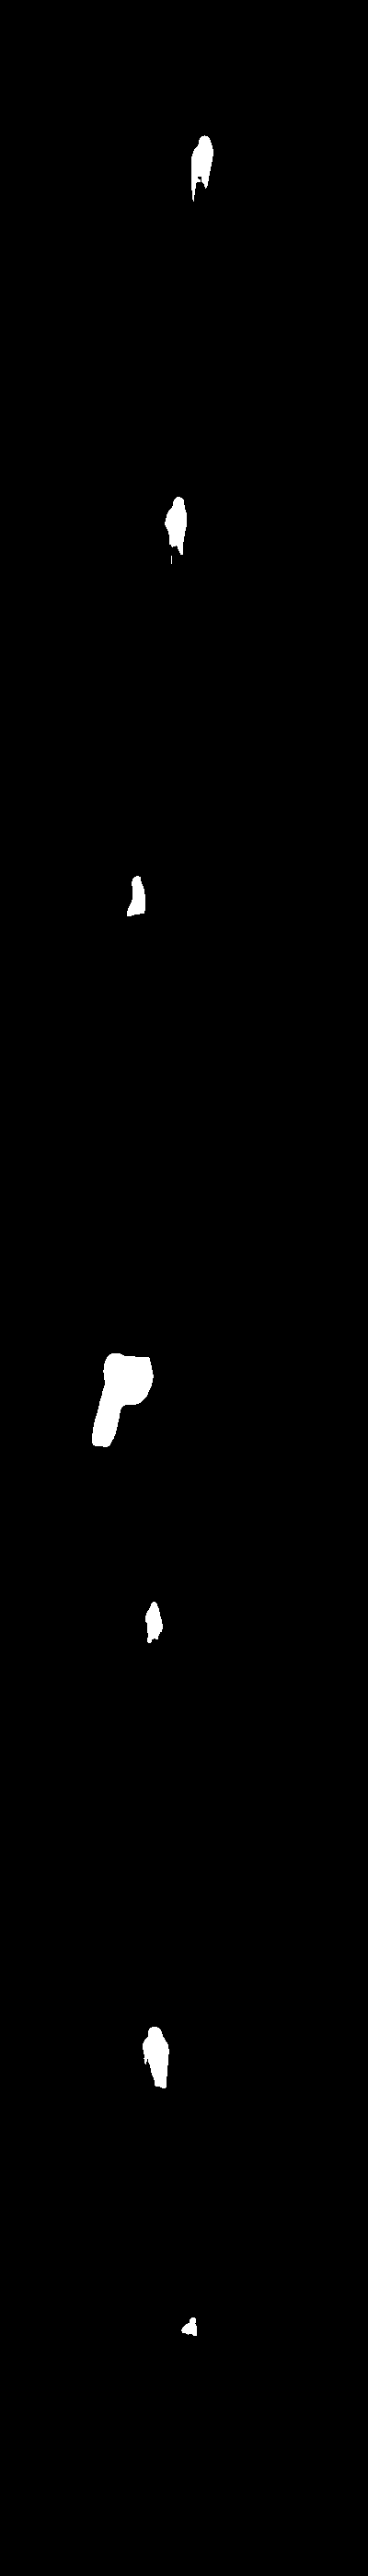

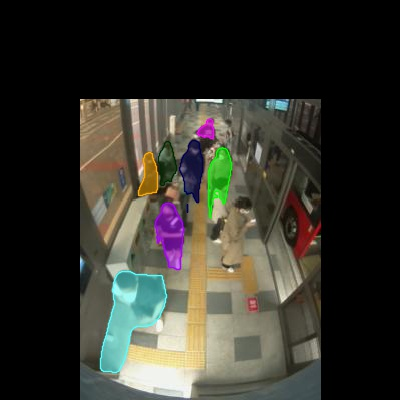

In [3]:
mask_img = Image.open(mask).convert('L')
display(mask_img)

segment_img = Image.open(segment)
display(segment_img)

In [4]:
mask_arr = np.array(mask_img)
h, w = mask_arr.shape[0], mask_arr.shape[1]

In [5]:
## split mask and save
split_arr = np.split(mask_arr, h/w, axis=0)

for i, j in enumerate(split_arr):
    im = Image.fromarray(np.uint8(j))
    im.save(f"data/splited/{i}.png")

In [ ]:
base_dir = "/media/z/0/MVPC10/CODE/pplcnt_model/auto_labeler/data/"


def tranformer(mask, ir):
    h_re, w_re = ir.shape[:2]
    scale = 27
    reshaped_size = (h_re*scale, w_re*scale)

    rgb_reshaped = cv2.resize(mask, reshaped_size)
    ir_reshaped = cv2.resize(ir, reshaped_size)

    x, y, xw, yh = -1.5*scale, -11.8*scale, 1.25, 1.12

    alpha = 1.0
    while True:
        matrix = np.float32([[xw, 0, y], [0, yh, x], [0, 0, 1]])
        warped = cv2.warpPerspective(rgb_reshaped, matrix, reshaped_size)
        overlayed = cv2.addWeighted(src1=ir_reshaped, alpha=alpha, src2=warped, beta=1-alpha, gamma=0)

        cv2.imshow("overlayed", overlayed)

        key = cv2.waitKey()
        if key == ord('p'): cv2.imwrite("warped.jpg", warped)

        elif key == 82: x -= 1
        elif key == 84: x += 1
        elif key == 81: y -= 1
        elif key == 83: y += 1

        elif key == ord('a'): xw -= 0.01
        elif key == ord('s'): xw += 0.01
        elif key == ord('z'): yh -= 0.01
        elif key == ord('x'): yh += 0.01

        elif key == ord('q'):
            alpha -= 0.02
            if alpha < 0: alpha = 0
        elif key == ord('w'):
            alpha += 0.02
            if alpha > 1: alpha = 1

        elif key == 27:
            cv2.destroyAllWindows()
            break
        # print(f'{x}, {y}, {xw:.2f}, {yh:.2f}')


for i in range(6):
    mask_name = f"/splited/{i}.png"
    # ir_name = "1650444796136.png"
    ir_name = "20220513-182408_03_IR.png"
    mask = cv2.imread(f"{base_dir}{mask_name}")
    ir = cv2.imread(f"{base_dir}{ir_name}")

    tranformer(mask, ir)

In [ ]:
## masking ir_img

base_dir = "/media/z/0/MVPC10/CODE/pplcnt_model/auto_labeler/data/"

for i in range(6):
    mask_name = f"/splited/{i}.png"
    # ir_name = "1650444796136.png"
    ir_name = "20220513-182408_03_IR.png"

    mask = cv2.imread(f"{base_dir}{mask_name}")
    ir = cv2.imread(f"{base_dir}{ir_name}")

    h_re, w_re = ir.shape[:2]
    scale = 27
    reshaped_size = (h_re*scale, w_re*scale)

    mask_reshaped = cv2.resize(mask, reshaped_size)
    ir_reshaped = cv2.resize(ir, reshaped_size)

    mask_arr = np.array(mask_reshaped)

    masked = ir_reshaped * mask_reshaped

    cv2.imshow("masked", masked)
    key = cv2.waitKey()
    # if key == 27:
cv2.destroyAllWindows()


    #
    # x, y, xw, yh = -1.5*scale, -11.8*scale, 1.25, 1.12
    #
    # alpha = 1.0
    # matrix = np.float32([[xw, 0, y], [0, yh, x], [0, 0, 1]])
    # warped = cv2.warpPerspective(mask_reshaped, matrix, reshaped_size)
    # overlayed = cv2.addWeighted(src1=ir_reshaped, alpha=alpha, src2=warped, beta=1-alpha, gamma=0)
    #
    # cv2.imshow("overlayed", overlayed)
    # key = cv2.waitKey()
    # if key == ord('p'): cv2.imwrite("warped.jpg", warped)
    #
    # elif key == 82: x -= 1
    # elif key == 84: x += 1
    # elif key == 81: y -= 1
    # elif key == 83: y += 1
    #
    # elif key == ord('a'): xw -= 0.01
    # elif key == ord('s'): xw += 0.01
    # elif key == ord('z'): yh -= 0.01
    # elif key == ord('x'): yh += 0.01
    #
    # elif key == ord('q'):
    #     alpha -= 0.02
    #     if alpha < 0: alpha = 0
    # elif key == ord('w'):
    #     alpha += 0.02
    #     if alpha > 1: alpha = 1
    #
    # elif key == 27:
    #     cv2.destroyAllWindows()
    #     break
    # print(f'{x}, {y}, {xw:.2f}, {yh:.2f}')
